In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import joblib
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper

In [2]:
df = pd.read_csv("D:/estela/src/cilia_quantification.csv")
df

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median,classes
0,1,719.0,18.294934,8.525367,174.0,0.896509,12.0,NaN
1,2,834.0,21.121715,8.043381,126.0,0.875131,12.0,NaN
2,3,749.0,17.807669,8.183166,133.0,0.858945,11.0,NaN
3,4,584.0,22.366502,6.900171,125.0,0.732748,12.0,NaN
4,5,457.0,20.177920,4.147177,67.0,0.887379,11.0,NaN
...,...,...,...,...,...,...,...,...
415,416,941.0,21.670160,8.111516,110.0,0.888574,14.0,NaN
416,417,500.0,14.569206,7.973495,153.0,0.904159,13.0,NaN
417,418,728.0,19.896112,7.929379,200.0,0.864608,13.0,NaN
418,419,937.0,21.872716,8.837211,180.0,0.893232,16.0,NaN


In [3]:
df_classes = df.dropna(subset=["classes"])
df_classes

,label,area,axis_major_length,axis_minor_length,intensity_max,solidity,intensity_median,classes
34,35,41335.0,430.224657,25.189398,122.0,0.053354,12.0,elongated
48,49,4207.0,30.180982,15.334478,222.0,0.811692,14.0,elongated
52,53,5945.0,68.243484,17.205946,182.0,0.409605,13.0,elongated
65,66,11353.0,155.541823,13.526839,127.0,0.369504,13.0,elongated
101,102,1106.0,20.890026,8.539950,133.0,0.863388,12.5,fibroblastic
102,103,991.0,16.593428,10.594777,255.0,0.868536,13.0,fibroblastic
103,104,718.0,15.640825,9.339870,251.0,0.886420,12.0,fibroblastic
108,109,473.0,13.805958,7.556105,110.0,0.885768,11.0,fibroblastic
109,110,775.0,18.296414,8.143986,139.0,0.874718,13.0,fibroblastic
110,111,681.0,15.209903,8.561274,171.0,0.889034,13.0,fibroblastic


In [4]:
X = df_classes[["solidity", "axis_minor_length"]]
y = df_classes["classes"]

# scaler = StandardScaler()
# scaler.fit(X)
# X_transformed = scaler.transform(X)

mapper = DataFrameMapper([(X.columns, StandardScaler())])
scaler = mapper.fit(X)
scaled_features = scaler.transform(X)
scaled_features_df = pd.DataFrame(
    scaled_features, index=X.index, columns=X.columns
)

In [5]:
neigh = {}

In [6]:
neigh["uniform_3"] = KNeighborsClassifier(n_neighbors=3)
neigh["uniform_3"].fit(scaled_features_df, y)

KNeighborsClassifier(n_neighbors=3)

In [7]:
neigh["uniform_5"] = KNeighborsClassifier(n_neighbors=5)
neigh["uniform_5"].fit(scaled_features_df, y)

KNeighborsClassifier()

In [8]:
def get_color(kind):
    if kind == "elongated":
        return 1
    elif kind == "fibroblastic":
        return 2
    elif kind == "looped":
        return 3
    else:
        return 4

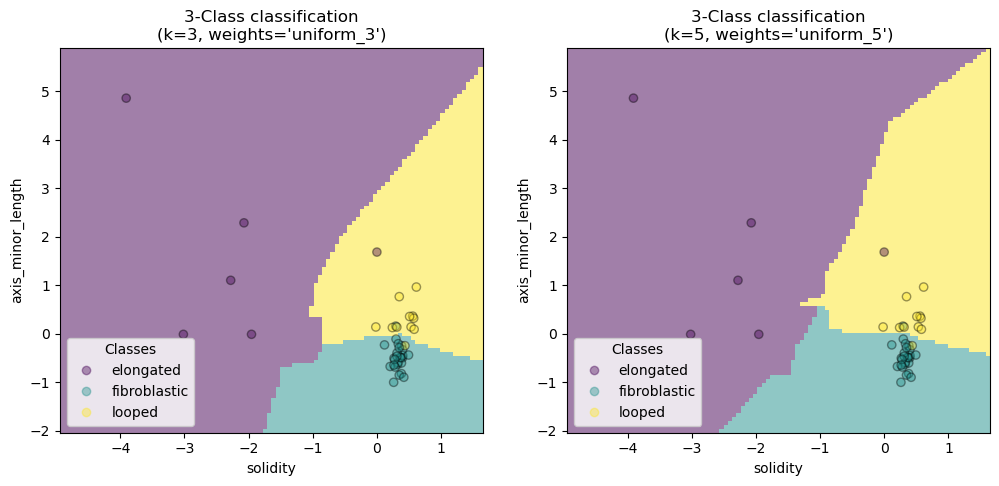

In [9]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform_3", "uniform_5")):
    disp = DecisionBoundaryDisplay.from_estimator(
        neigh[weights],
        scaled_features_df,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=scaled_features_df.columns[0],
        ylabel=scaled_features_df.columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        scaled_features_df.iloc[:, 0],
        scaled_features_df.iloc[:, 1],
        c=y.apply(get_color),
        edgecolors="k",
        alpha=0.4,
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        np.unique(y),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={neigh[weights].n_neighbors}, weights={weights!r})"
    )

plt.show()

Since one of the values corresponding as the elongated is wrongly classified as looped. We are going to try to correct that by using distance as another parameter for the classification.

In [10]:
neigh["distance_3"] = KNeighborsClassifier(n_neighbors=3, weights="distance")
neigh["distance_3"].fit(scaled_features_df, y)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [11]:
neigh["distance_5"] = KNeighborsClassifier(n_neighbors=5, weights="distance")
neigh["distance_5"].fit(scaled_features_df, y)

KNeighborsClassifier(weights='distance')

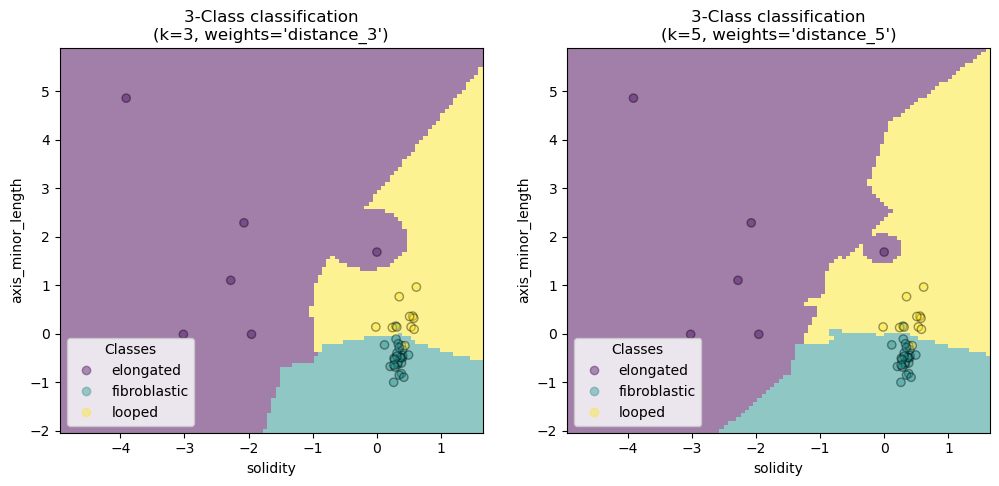

In [12]:
_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("distance_3", "distance_5")):
    disp = DecisionBoundaryDisplay.from_estimator(
        neigh[weights],
        scaled_features_df,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=scaled_features_df.columns[0],
        ylabel=scaled_features_df.columns[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(
        scaled_features_df.iloc[:, 0],
        scaled_features_df.iloc[:, 1],
        c=y.apply(get_color),
        edgecolors="k",
        alpha=0.4,
    )
    disp.ax_.legend(
        scatter.legend_elements()[0],
        np.unique(y),
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={neigh[weights].n_neighbors}, weights={weights!r})"
    )

plt.show()

n=3 seems to be the one working the best

## Saving scaler and classifer

In [15]:
joblib.dump(scaler, "D:/estela/results/20240410/scaler.sca")

['D:/estela/results/20240410/scaler.sca']

In [19]:
joblib.dump(
    neigh["distance_3"], "D:/estela/results/20240410/cilia_classifier.ml"
)

['D:/estela/results/20240410/cilia_classifier.ml']

To open both the scaler and classifier the following is used:

In [43]:
# scaler = joblib.load('D:/estela/results/20240410/scaler.bin')

In [42]:
# cilia_classifier = joblib.load('D:/estela/results/20240410/cilia_classifier.bin')